# <font color='gold'>**_Análise Exploratória Descritiva: Metacritc Score - Video Games_**</font> 🎮


<kbd><img src="https://raw.githubusercontent.com/JoSEPHDev2022/Metacritc_Scores_Video_Games/main/images/gamer_stock.jpg" width=1000 height=350></kbd>
---

# <font color='gold'>**_Objetivos_**</font>

---

Nesse projeto, iremos realizar uma análise exploratória descritiva de dados em um [Dataset](https://www.kaggle.com/datasets/patkle/metacritic-scores-for-games-movies-tv-and-music) que contém avaliações fornecidas pelo [Metacritic](https://www.metacritic.com/game) sobre diversos títulos de Video-Game. Como um sumário do que será realizado nesse projeto, temos:

<font color='gold'>**_1._**</font> **Compreender os Dados**:
- Aqui será realizada uma análise estatística-descritiva dos dados crus, buscando compreender seu formato e suas características centrais originais.

<font color='gold'>**_2._**</font> **Limpeza, Correção e Tratamento**:
- Realizaremos a limpeza e tratamento desses dados. Com as informações adiquiridas na etapa anterior, iremos buscar adaptar e refatorar o Dataset para o melhor formato possível.

- Utilizaremos funções como principal maneira de limpeza e tratamento.

- Também iremos utilizar de Histogramas e Boxplots/Violinplots para visualizarmos a distribuição dos dados, outliers e etc.

<font color='gold'>**_3._**</font> **Análise Exploratória e Visualizações**:
- Após a compreensão e tratamento desses dados, iremos realizar uma análise exploratória, buscando gerar insights e a retirada de informações relevantes e curiosas dos dados.

- Para isso, utilizaremos de diversas visualizações utilizando Matplotlib e Seaborn.

# <font color='gold'>**_Importando Pacotes e Compreendendo Dados_**</font>

---

In [198]:
# Importando bibliotecas necessárias para análise:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from platform import python_version
from matplotlib.pyplot import FuncFormatter

# Setando estilo escuto do grid para gráficos Seaborn:
sns.set_theme(context='notebook', style='darkgrid')

# Filtrando avisos de erro:
warnings.filterwarnings('ignore')

# Mostrando versões utilizadas:
print(' Pacotes Prontos! Versões Utilizadas: '.center(70, '-'))
print(f'Python:     --> {python_version()}')
print(f'Pandas:     --> {pd.__version__}')
print(f'Numpy:      --> {np.__version__}')
print(f'Matplotlib: --> {matplotlib.__version__}')
print(f'Seaborn:    --> {sns.__version__}')


---------------- Pacotes Prontos! Versões Utilizadas: ----------------
Python:     --> 3.9.16
Pandas:     --> 1.5.2
Numpy:      --> 1.23.5
Matplotlib: --> 3.6.2
Seaborn:    --> 0.11.2


In [110]:
# Criando o Dataframe:
data_raw = pd.read_csv('data/games.csv', sep=',')

In [111]:
# Visualizando primeiros registros:
data_raw.head(10)

,id,metascore,platform,release_date,sort_no,summary,title,user_score
0,543718,91,PC,"August 18, 2020",301,"From light planes to wide-body jets, fly highl...",Microsoft Flight Simulator,7.1
1,555108,91,PC,"December 8, 2022",302,"Take up your sword, channel your magic or boar...",Chained Echoes,8.7
2,106820,91,PlayStation 2,"November 7, 2005",303,"Strap on your Guitar Hero SG controller, plug-...",Guitar Hero,8.5
3,110775,91,PC,"November 13, 2008",304,"Players last visited Northrend in ""Warcraft II...",World of Warcraft: Wrath of the Lich King,7.7
4,142864,91,Wii,"October 26, 2010",305,Rock Band returns with the third iteration of ...,Rock Band 3,6.8
5,114951,91,Wii,"August 24, 2009",306,Metroid Prime 3: Corruption set a new standard...,Metroid Prime Trilogy,9
6,397035,91,PC,"May 23, 2016",307,Overwatch is a highly stylized team-based shoo...,Overwatch,6.4
7,102812,91,PC,"June 24, 2003",308,Cutting-edge technology brings you the most ac...,F1 Challenge '99-'02,7.7
8,161540,91,GameCube,"October 23, 2002",309,Drop into the ultimate challenge. In the next...,Tony Hawk's Pro Skater 4,8.2
9,100705,91,PlayStation 2,"October 23, 2000",310,EA Sports steps up to the challenge of Sega's ...,Madden NFL 2001,7.5


In [112]:
# Visualizando um sample aleatório dos dados:
data_raw.sample(10)

,id,metascore,platform,release_date,sort_no,summary,title,user_score
19719,153309,38,Xbox 360,"May 3, 2011",19720,Thor: The Video Game will take players through...,Thor: God of Thunder,5.9
14770,548880,64,Switch,"September 24, 2019",14771,"In the tradition of Jedi Knight, rebel agent K...",Star Wars Jedi Knight II: Jedi Outcast,5.3
4890,504570,80,PC,"November 29, 2016",4891,Natural Disasters features a catalog of catast...,Cities: Skylines - Natural Disasters,6.2
6926,102178,77,PC,"August 20, 2002",6927,Dropped into the frozen wastelands of Antarcti...,The Thing,7.7
15472,162483,63,GameCube,"October 31, 2004",15473,"Superstrength, superspeed, invisibility, and e...",The Incredibles,6.3
19125,101900,47,PlayStation 2,"October 19, 2002",19126,It's early 21st century and the majority of th...,Conflict Zone,7.4
13448,113260,67,PC,"August 11, 2009",13449,Still Life 2 is the second chapter in the Stil...,Still Life 2,5.6
15377,106146,63,PlayStation 2,"May 31, 2006",15378,Stacked is a Texas Hold 'em poker game that ca...,Stacked with Daniel Negreanu,5.3
10870,543838,71,Switch,"October 4, 2019",10871,"After a night of fun, passion, and one too man...",One Night Stand,tbd
6095,104381,78,PC,"September 21, 2004",6096,The game's map spans the entire world and allo...,Hearts of Iron: Platinum,7.3


Com a visualização geral dos dados podemos nos aprofundar mais em suas características:

In [113]:
# Checando dimensões dos dados:
data_raw.shape

(20022, 8)

Temos um dataset relativamente grande, contendo <font color='gold'>**_20.022_ registros**</font> em <font color='gold'>**_8 variáveis_**</font> diferentes.

Vamos checar informações mais específicas acerca dessas variáveis:

In [114]:
# Visão mais detalhada das variáveis:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20022 entries, 0 to 20021
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            20022 non-null  int64 
 1   metascore     20022 non-null  int64 
 2   platform      20022 non-null  object
 3   release_date  20022 non-null  object
 4   sort_no       20022 non-null  int64 
 5   summary       19930 non-null  object
 6   title         20022 non-null  object
 7   user_score    20022 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.2+ MB


Informações relevantes:

- Temos alguns valores faltantes apenas na coluna **`summary`**, o que indica que o Dataset está bem completo. Também, esse fator não é um problema por a coluna **`summary`** não será utilizada nas análises.

- Sobre os Data types utilizados: 

    - iremos avaliar mudanças possíveis, como int32 em vez de int64 nas colunas que possuem esse data type. 

    - A coluna **`release_date`** será trasnformada em uma coluna do tipo date em vez de object.

    - A coluna **`user_score`** está no formato object quando deveria estar em float, por se tratar da variável que contém as avaliações fornecidas pelos usuários.
    
Com essas mudanças, a memória consumida será reduzida. Nesse dataset não fará uma diferença notável na performance, porém é uma boa prática sempre deixar os dados no formato mais eficiente possível.

## **Análise Estatística - Descritiva dos Dados**

Conseguimos coletar informações relevantes sobre os dados na etapa anterior, porém para podermos ter uma visão realmente aprofundada desses dados, vamos realizar uma análise estatística para descrever esse conjunto.

- Resumo Estatístico das Variáveis Numéricas:

In [115]:
# Utilizando método describe nas colunas numéricas:
data_raw.describe()

,id,metascore,sort_no
count,20022.000000,20022.000000,20022.000000
mean,296058.651084,70.758566,10011.500000
std,190522.456059,12.165042,5779.997881
min,100002.000000,11.000000,1.000000
25%,112180.250000,64.000000,5006.250000
50%,188870.500000,72.000000,10011.500000
75%,510982.250000,80.000000,15016.750000
max,626054.000000,99.000000,20022.000000


Nesse dataset temos três variáveis numéricas, porém apenas **`metascore`** nos importa para essa análise, pois as outras duas variáveis são **`id`** e **`sort_no`** não contém informações relevantes por se tratarem de variáveis de organização dos dados (id, clasificação, etc).

Sobre a coluna **`metascore`**:

- A média geral da avaliação do Metacritic para os jogos (lembrando que essa avaliação vai de 0 a 100) é de <font color='gold'>**70.8**</font>, uma média bem alta considerando o limite de 100.

- O desvio padrão dessas avaliações é de  <font color='gold'>**12.2**</font> pontos acima ou abaixo da média.

- A avaliação mais baixa presente nos dados é de  <font color='gold'>**11**</font>, realmente um valor bem baixo.

- Já a avaliação mais alta é de  <font color='gold'>**99**</font>, aparentemente nenhum game recebeu a nota máxima de 100.

Sobre os quartis e percentis:

- 25% das avaliações do Metacritic estão abaixo ou são iguais a  <font color='gold'>**64**</font>;

- 50% das avaliações do Metacritic estão abaixo ou são iguais a  <font color='gold'>**72**</font>, esse valor representa a mediana das avaliações, ou seja, o valor central dos dados ordenados é 72;

- 75% das avaliações do metacritic estão abaixo ou são iguais a  <font color='gold'>**80**</font>;

- resumo Estatístico das Variáveis Categóricas:

In [116]:
# Utilizando método describe nas colunas categóricas:
data_raw.describe(exclude='number')

,platform,release_date,summary,title,user_score
count,20022,20022,19930,20022,20022
unique,22,4794,15545,12926,94
top,PC,"November 14, 2006","Iron Man, an explosive third-person action sho...",Madden NFL 07,tbd
freq,5276,48,7,9,1382


Das variáveis categóricas, **`release_date`** e **`user_score`** não são apropriadas para essa análise, pois deveriam estar em formato date e float respectivamente. Sendo assim, vamos olhar para as variáveis realmente categóricas nos dados:

**`platform`**

- Temos <font color='gold'>**22 plataformas diferentes**</font> nos dados. Isso indica uma variedade grande nas tecnologias utilziadas para games como consoles ao longo do tempo.

- A plataforma em que mais jogos estão presentes é o  <font color='gold'>**PC**</font>, contando com  <font color='gold'>**5.276 registros**</font> nos dados.

**`title`**

- Temos <font color='gold'>**12.926 títulos únicos nos dados**</font>. Isso indica que dos 20.022 títulos totais, 7.096 deles podem ser o mesmo jogo porém em um registro diferente para cada plataforma em que esse jogo foi lançado. Isso será explorado mais a frente.

Como dito previamente, a coluna `summary` não será utilizada, então sua descrição estatística não nos importa.

# <font color='gold'>**_Tratamento e Limpeza dos Dados_**</font>

---

Como analisamos acima com a análise estatística o Dataset não está num formato ideal, tendo data types indevidos para certas variáveis. Esse fator deixa a busca por outliers e a visualização da distribuição dos dados prejudicados, assim, iremos tratar os Data types dos dados, inserir colunas adicionais caso necessário para aprofundar a análise, renomear algumas colunas e reorganizar a distribuição dessas variáveis no Dataset. 

Após esses ajustes, poderemos utilziar de Histogramas e Boxplots para a visualização da distribuição dos dados com seus data types corrigidos, possibilitando a identificação e tratamento de outliers e a compreensão da distribuição desses dados.

Antes de qualquer modificação, se faz necessária a criação de uma cópia dos dados originais, onde será nessa cópia que todas as modificações serão realizadas.

In [117]:
# Criando cópia para modificação dos dados:
data_clean = data_raw.copy()

## **Exluíndo Variávies Desnecessárias para Análise**

As variáveis **`id`**, **`sort_no`** e **`summary`** serão removidas do dataset por não serem necessárias para a composição das análises.

In [118]:
# Excluíndo variáveis:
data_clean = data_clean.drop(['id', 'sort_no', 'summary'], axis=1)

In [119]:
# Verificando dados:
data_clean.head(5)

,metascore,platform,release_date,title,user_score
0,91,PC,"August 18, 2020",Microsoft Flight Simulator,7.1
1,91,PC,"December 8, 2022",Chained Echoes,8.7
2,91,PlayStation 2,"November 7, 2005",Guitar Hero,8.5
3,91,PC,"November 13, 2008",World of Warcraft: Wrath of the Lich King,7.7
4,91,Wii,"October 26, 2010",Rock Band 3,6.8


## **Renomeando Variáveis**

Com apenas as colunas que queremos presentes nos dados, vamos renomeá-las para padronização e visualização melhores.

In [120]:
# Renomenado variáveis:
data_clean = (data_clean
              .rename(columns=
                      {'metascore': 'Metascore',
                       'platform': 'Platform',
                       'release_date': 'Release_date',
                       'title': 'Game_title',
                       'user_score': 'User_score'}
                       ))

In [121]:
# Visualizando dados:
data_clean.head(5)

,Metascore,Platform,Release_date,Game_title,User_score
0,91,PC,"August 18, 2020",Microsoft Flight Simulator,7.1
1,91,PC,"December 8, 2022",Chained Echoes,8.7
2,91,PlayStation 2,"November 7, 2005",Guitar Hero,8.5
3,91,PC,"November 13, 2008",World of Warcraft: Wrath of the Lich King,7.7
4,91,Wii,"October 26, 2010",Rock Band 3,6.8


## **Alteração de Data Types**

Agora, vamos alterar os data types necessários. Para isso, vamos checar novamente esses dtypes:

In [122]:
# Checando dtypes:
data_clean.dtypes

Metascore        int64
Platform        object
Release_date    object
Game_title      object
User_score      object
dtype: object

Alterações:

- **`Metascore`** - Transformada para int8. Lembrando que int8 aceita valores que estão entre -128 e 128, já que o Metascore vai de 0 a 100, o formato int8 se torna ideal para essa variável.

- **`Release_date`** - Será transformada em Datetime.

- **`User_score`** - Transformada para float.

Para termos certeza que nossas alterações serão realizadas, vamos checar se a coluna **`Metascore`** e **`User_score`** possuem apenas valores numéricos:

In [123]:
# Checando se colunas possuem apenas valores numéricos:
print('Variável         Possuí Apenas Numéricos')

data_clean.apply(lambda values: 
                    pd.to_numeric(values, errors='coerce').notnull().all())

Variável         Possuí Apenas Numéricos


Metascore        True
Platform        False
Release_date    False
Game_title      False
User_score      False
dtype: bool

Com isso podemos notar que a variável **`Metascore`** possui apenas valores numéricos, porém **`User_score`** não. Sendo assim, para podermos alterar o dtype dessa variável, precisamos antes remover valores que não são numéricos. Vamos checar essa variável e seus valores:

In [124]:
# Checando valores da coluna user_score:
data_clean['User_score'].unique()

array(['7.1', '8.7', '8.5', '7.7', '6.8', '9', '6.4', '8.2', '7.5', '8.9',
       '9.1', '8.1', '8.6', '8.3', '7.9', '9.6', '8', '8.4', '5.9', '7.4',
       '6.7', '6.6', '8.8', '6', '7.8', '9.2', '4', '9.5', '6.3', '7.6',
       '7.3', '7.2', '6.2', '9.3', '7', '6.5', '5.6', '6.9', '5.7', '5.4',
       '3.3', '5', '5.2', '9.4', '5.8', '5.3', '3.5', '4.8', '6.1', '4.7',
       '4.2', '3.4', '2.1', 'tbd', '4.5', '4.1', '5.5', '3', '2.8', '4.4',
       '3.9', '4.9', '3.6', '4.3', '5.1', '1.8', '4.6', '3.1', '9.7',
       '3.2', '2.2', '2.9', '2.5', '3.7', '3.8', '2', '2.7', '2.3', '1.6',
       '1.3', '2.6', '0.9', '2.4', '1.4', '1.5', '1.7', '1', '1.1', '1.9',
       '0.6', '0.5', '0.3', '1.2', '0.7'], dtype=object)

Com isso, vemos que alguns registros possuem o valor **'tbd'** que é uma string. Vamos checar quantos registros possuem essa string:

In [125]:
# Contando aparições da string 'tbd':
data_clean[data_clean['User_score'] == 'tbd']['User_score'].count() 

1382

Temos **1.382** registros que contém a string 'tbd'. Com uma rápida pesquisa na página de fonte desses dados no Metacritic, temos que a string 'tbd' representa jogos que não tiveram nenhuma avaliação dos usuários até então. Nesse caso, iremos substituir esses valores por -1 antes de realizar a alteração do data type para float. 

-1 pois como o range de notas possíveis dos usuários é de 0 a 10, inserir um valor negativo implicíta que aquele registro não recebeu avaliação

In [126]:
# Substituíndo a string por 0:
data_clean['User_score'] = (data_clean['User_score']
              .apply(lambda value: -1 if value == 'tbd' else value))

In [127]:
# Contando aparições da string 'tbd':
data_clean[data_clean['User_score'] == 'tbd']['User_score'].count() 

0

Com as variáveis no formato adequado, podemos alterar os data types:

In [128]:
# Alterando dtypes:
data_clean = (data_clean
              .astype({'Metascore': 'int8',
                       'User_score': 'float'}))

data_clean['Release_date'] = pd.to_datetime(data_clean['Release_date'])

Com as alterações feitas nos data types, vamos checar o consumo de memória dos dados:

In [129]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20022 entries, 0 to 20021
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Metascore     20022 non-null  int8          
 1   Platform      20022 non-null  object        
 2   Release_date  20022 non-null  datetime64[ns]
 3   Game_title    20022 non-null  object        
 4   User_score    20022 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int8(1), object(2)
memory usage: 645.4+ KB


Podemos ver a diferença expressiva que as alterações de data types teve na performance dos nossos dados. Antes da alteração dos dados, tinhamos um consumo de memória de 1.2+ MB, agora com as alterações, temos um uso de memória de 528+ KB.

In [130]:
# Checando dados:
data_clean.head(5)

,Metascore,Platform,Release_date,Game_title,User_score
0,91,PC,2020-08-18,Microsoft Flight Simulator,7.1
1,91,PC,2022-12-08,Chained Echoes,8.7
2,91,PlayStation 2,2005-11-07,Guitar Hero,8.5
3,91,PC,2008-11-13,World of Warcraft: Wrath of the Lich King,7.7
4,91,Wii,2010-10-26,Rock Band 3,6.8


## **Criando Nova Variável: Trimestre de Lançamento**

Como forma de expandir nossas possibilidades de análise, vamos inserir nos dados uma nova variável que informa qual o trimestre do ano em que o Jogo foi lançado.

In [131]:
def set_year_quarter(data: pd.DataFrame) -> pd.DataFrame:
    '''Retorna uma nova variável que informa o trimestre do ano em que
    o jogo foi lançado. Essa definição de trimestre se baseia no mês de lançamento
    da coluna Release_date.
    
    PARÂMETROS:
    
        data > DataFrame para se aplicar a alteração.
    '''
    data['Release_quarter'] = data['Release_date'].apply(
        lambda value:
            'Q1' if value.month in [1, 2, 3] else
            'Q2' if value.month in [4, 5, 6] else
            'Q3' if value.month in [7, 8, 9] else
            'Q4' if value.month in [10, 11, 12] else
            value
            )
    
    return data

In [132]:
# Aplicando função:
data_clean = set_year_quarter(data_clean)

# Checando resultado:
data_clean.sample(10)

,Metascore,Platform,Release_date,Game_title,User_score,Release_quarter
12485,69,PlayStation 4,2016-02-09,Arslan: The Warriors of Legend,7.1,Q1
15564,63,PlayStation 2,2004-03-02,Drakengard,8.0,Q1
18356,53,PlayStation 4,2020-04-28,Daymare: 1998,6.9,Q2
2002,85,PlayStation 4,2014-01-28,Tomb Raider: Definitive Edition,8.1,Q1
6004,78,PC,2012-11-06,Chaos on Deponia,8.3,Q4
1643,85,3DS,2016-07-15,Monster Hunter Generations,8.0,Q3
1834,85,PlayStation,2000-11-14,FIFA 2001 Major League Soccer,7.2,Q4
17857,55,PlayStation 4,2017-05-16,Akiba's Beat,6.9,Q2
11195,71,PlayStation 4,2018-02-13,The Fall Part 2: Unbound,7.8,Q1
19141,47,PC,2015-10-21,Coast Guard,3.7,Q4


## **Criando Nova Variável: Subdivisões da Variável Release_date**

Com a nova variável de trimestre de lançamento criada, vamos retornar a variável **`Release_date`** e utilizá-la para criar três variáveis distintas que informam apenas o dia, mês e ano do lançamento.

Essa divisão da variável **`Release_date`** será feita para facilitar a criação de plots na etapa de análises.

- Criando variável **`Release_day`**:

In [133]:
# Criando nova variável:
data_clean['Release_day'] = data_clean['Release_date'].dt.day

- Criando variável **`Release_month`**:

In [134]:
# Criando nova variável:
data_clean['Release_month'] = data_clean['Release_date'].dt.month

- Criando variável **`Release_year`**:

In [135]:
# Criando nova variável:
data_clean['Release_year'] = data_clean['Release_date'].dt.year

In [136]:
# Checando dados:
data_clean.head(5)

,Metascore,Platform,Release_date,Game_title,User_score,Release_quarter,Release_day,Release_month,Release_year
0,91,PC,2020-08-18,Microsoft Flight Simulator,7.1,Q3,18,8,2020
1,91,PC,2022-12-08,Chained Echoes,8.7,Q4,8,12,2022
2,91,PlayStation 2,2005-11-07,Guitar Hero,8.5,Q4,7,11,2005
3,91,PC,2008-11-13,World of Warcraft: Wrath of the Lich King,7.7,Q4,13,11,2008
4,91,Wii,2010-10-26,Rock Band 3,6.8,Q4,26,10,2010


## **Criando Nova Variável: Metascore_class**

Essa variável tem como objetivo abrigar a classificação dos valores do Metascore. De acordo com um [FAQ do próprio site](https://www.metacritic.com/about-metascores), para cada range de notas temos uma classificação geral atribuída a ele como ilustrado na imagem abaixo retirada diretamente do FAQ:

<img src="https://raw.githubusercontent.com/JoSEPHDev2022/Metacritc_Scores_Video_Games/main/images/metascore_classification.png" width=700 height=350>

Com essa nova variável, teremos mais possibilidades de análise posteriores.

In [137]:
def set_metascore_class(data: pd.DataFrame) -> pd.DataFrame:
    '''Retorna uma nova variável que consta a classificação do Jogo
    com base em sua nota. Essas classificações são:
    
        - "Universal Acclaim" para games com notas entre 90 e 100;
        - "Generally Favorable Reviews" para games com notas entre 75 e 89;
        - "Mixed or Average Reviews" para games com notas entre 50 e 74;
        - "Generally Unfavorable Reviews" para games com notas entre 20 e 49;
        - "Overwhelming Dislike" para games com notas entre 0 e 19.

        PARÂMETROS:
        
        data > DataFrame para se aplicar a alteração. 
    '''
    data['Classification'] = data['Metascore'].apply(
        lambda value:
            'Universal Acclaim' if 90 <= value <= 100 else
            'Generally Favorable Reviews' if 75 <= value <= 89 else
            'Mixed or Average Reviews' if 50 <= value <= 74 else
            'Generally Unfavorable Reviews' if 20 <= value <= 49 else
            'Overwhelming Dislike'   
            )
    
    return data

In [138]:
# Aplicando função:
data_clean = set_metascore_class(data_clean)

In [139]:
# Visualizando resultados:
data_clean.sample(10)

,Metascore,Platform,Release_date,Game_title,User_score,Release_quarter,Release_day,Release_month,Release_year,Classification
16951,59,Switch,2017-06-13,Disney/Pixar Cars 3: Driven to Win,5.5,Q2,13,6,2017,Mixed or Average Reviews
16245,61,PlayStation 2,2009-05-26,Secret Agent Clank,6.1,Q2,26,5,2009,Mixed or Average Reviews
8435,75,PlayStation,1999-11-30,Toy Story 2: Buzz Lightyear to the Rescue!,8.2,Q4,30,11,1999,Generally Favorable Reviews
16572,60,PlayStation 4,2019-06-25,Super Neptunia RPG,3.9,Q2,25,6,2019,Mixed or Average Reviews
13704,67,PC,2020-12-01,Chronos: Before the Ashes,5.9,Q4,1,12,2020,Mixed or Average Reviews
19604,40,PC,2009-05-27,Delta Force: Xtreme 2,4.9,Q2,27,5,2009,Generally Unfavorable Reviews
7687,76,Xbox 360,2011-10-11,Dragon Age II: Mark of the Assassin,5.5,Q4,11,10,2011,Generally Favorable Reviews
9636,73,Xbox 360,2014-02-05,The Wolf Among Us: Episode 2 - Smoke and Mirrors,7.8,Q1,5,2,2014,Mixed or Average Reviews
8612,74,Xbox One,2020-07-21,Rock of Ages 3: Make & Break,6.6,Q3,21,7,2020,Mixed or Average Reviews
13745,67,Wii,2009-06-30,Roogoo: Twisted Towers,-1.0,Q2,30,6,2009,Mixed or Average Reviews


## **Reorganizando Sequência de Variáveis**

Com todas as variáveis com data types apropriados e com a inserção das novas variáveis, basta organizar os dados para uma visualização melhor da tabela:

In [140]:
# Reorganizando aparição das colunas no DataFrame:
data_clean = data_clean.loc[:, 
                            ['Game_title', 'Platform', 'Release_date', 'Release_year', 
                             'Release_month', 'Release_day', 'Release_quarter', 'User_score', 
                             'Metascore', 'Classification']]

In [141]:
# Verificando forma final dos dados:
data_clean.head(10)

,Game_title,Platform,Release_date,Release_year,Release_month,Release_day,Release_quarter,User_score,Metascore,Classification
0,Microsoft Flight Simulator,PC,2020-08-18,2020,8,18,Q3,7.1,91,Universal Acclaim
1,Chained Echoes,PC,2022-12-08,2022,12,8,Q4,8.7,91,Universal Acclaim
2,Guitar Hero,PlayStation 2,2005-11-07,2005,11,7,Q4,8.5,91,Universal Acclaim
3,World of Warcraft: Wrath of the Lich King,PC,2008-11-13,2008,11,13,Q4,7.7,91,Universal Acclaim
4,Rock Band 3,Wii,2010-10-26,2010,10,26,Q4,6.8,91,Universal Acclaim
5,Metroid Prime Trilogy,Wii,2009-08-24,2009,8,24,Q3,9.0,91,Universal Acclaim
6,Overwatch,PC,2016-05-23,2016,5,23,Q2,6.4,91,Universal Acclaim
7,F1 Challenge '99-'02,PC,2003-06-24,2003,6,24,Q2,7.7,91,Universal Acclaim
8,Tony Hawk's Pro Skater 4,GameCube,2002-10-23,2002,10,23,Q4,8.2,91,Universal Acclaim
9,Madden NFL 2001,PlayStation 2,2000-10-23,2000,10,23,Q4,7.5,91,Universal Acclaim


# <font color='gold'>**_Análise Exploratória de Dados: Distribuição dos Dados_**</font>

Com nossos dados organizados e tratados, vamos utilizar de Histogramas para visualizar a distribuição dos data points nas variáveis, também utilizaremos violinplots para descrever mais acuradamente esses dados.

Como um passo primário no entanto, iremos utilziar o método describe novamente, para checar uma descrição estatística dos dados organizados e das novas variáveis adicionadas na etapa anterior.

## **Descrição Estatística dos Dados Tratados**

In [142]:
# Utilizando método describe para analisar variáveis numéricas:
data_clean.describe()

,Release_year,Release_month,Release_day,User_score,Metascore
count,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000
mean,2011.795475,7.000499,16.531415,6.412022,70.758566
std,6.493958,3.346318,8.630879,2.405527,12.165042
min,1995.000000,1.000000,1.000000,-1.000000,11.000000
25%,2006.000000,4.000000,9.000000,6.000000,64.000000
50%,2012.000000,8.000000,17.000000,7.100000,72.000000
75%,2018.000000,10.000000,24.000000,7.900000,80.000000
max,2023.000000,12.000000,31.000000,9.700000,99.000000


Com a tabela acima, podemos realizar novas análises interessantes sobre nossos dados:

Variável **`Release_year`**

- Quartis e Percentis:

    - Até **25% dos jogos** presentes no Dataset foram **lançados em 2006 ou antes**;

    - Até **50% dos jogos** presentes no Dataset foram **lançados em 2012 ou antes**;
    - Até **75% dos jogos** presentes no Dataset foram **lançados em 2018 ou antes**;

- Min e Max:
    - O jogo mais antigo presente no Dataset é de 1995;

    - O jogo mais recente presente no Dataset é de 2023;

Variável **`User_score`**

- Quartis e Percentis:
    - Até **25% dos usuários** forneceram notas iguais a ou menores que **6**;

    - Até **50% dos usuários** forneceram notas iguais a ou menores que **7.1**;
    - Até **75% dos usuários** forneceram notas iguais a ou menores que **7.9**;
    
- Min e Max:
    - A maior nota fornecida por usuários foi de 9.7;

    - A menor nota fornecida por usuários foi de 0.

- Média e Desvio Padrão:
    - A média geral das notas é aproximadamente 6.4;
    
    - Tendo desvio padrão de aroximandamente 2.4 pontos para mais ou para menos da média.

In [143]:
# Utilizando método describe para analisar variáveis categóricas:
data_clean.describe(exclude='number')

,Game_title,Platform,Release_date,Release_quarter,Classification
count,20022,20022,20022,20022,20022
unique,12926,22,4794,4,5
top,Madden NFL 07,PC,2006-11-14 00:00:00,Q4,Mixed or Average Reviews
freq,9,5276,48,6253,10222
first,NaN,NaN,1995-04-30 00:00:00,NaN,NaN
last,NaN,NaN,2023-02-02 00:00:00,NaN,NaN


Acerca das variáveis categóricas, temos as seguintes informações:

Variável **`Game_title`**

- O jogo mais com mais aparições no Dataset é **Madden NFL 07**, constando com 9 aparições nos dados.


Variável **`Release_date`**

- A data em que mais jogos foram lançados no mesmo dia, foi em **14 de Novembro de 2006**, data que consta como de lançamento 48 vezes nos dados;
    
- A data mais antiga de lançamento de jogos presente nos dados é o dia **30 de Abril de 1995**;
- Já a data mais recente de lançamento, é o dia **02 de Fevereiro de 2023**.

Variável **`Release_quarter`**

- O período do ano com mais lançamentos de jogos é o **Quarto Trimestre**, constando como período de lançamento para 6253 jogos no registro (cerca de 31% do total);

Variável **`Classification`**

- A classificação mais atribuída aos jogos do Dataset é **Mixed or Average Reviews**, que engloba 10222 registros dos dados (cerca de 51% do total);

## **Distribuição dos Dados Tratados**

Um ponto importante de uma análise estatística descritiva, é buscar compreender as seguintes características dos dados:

**Centralidade**

- O centro da distribuição dos data points. Identificar onde esses dados tendem a estarem agrupados.

**Amplitude**

- O intervalo de valores presentes na distribuição entre o valor máximo e mínimo.

**Simetria**

- Identificar a distribuição dos dados pela variável analisada, buscando avaliar valores discrepantes, muito altos ou baixos, a esqueda ou a direita.

Para podermos visualizar essas características, a melhor opção é o uso de um Histograma, e para isso, iremos delimitar uma função de criação para um:

In [203]:
def histogram_plot(data: pd.DataFrame, column: pd.Series, bin_width: float, title: str):
    '''Retorna um Histograma detalhado sobre os dados fornecidos.
    
    PARÂMETROS:

        - data > Um DataFrame do Pandas contendo os dados;
        - column > Uma Series do Pandas contendo os dados desejados para plotagem;
        - bin_width: > Número float para a dimensão das barras do histograma;
        - title > O título desejado para o plot.
    '''
    fig, ax1 = plt.subplots(figsize=(12,6))

    ax2 = sns.histplot(data=data, 
                       x=column, 
                       kde=True,
                       label='Frequência', 
                       binwidth=bin_width,
                       edgecolor='black', 
                       line_kws={'linestyle': 'dashdot'},
                       color='#151bbf')
    
    ax2.set_title(title, fontdict={'size': 15, 
                                   'weight': 'bold'})
    
    ax2.set_ylabel('Num. Registros', fontdict={'size': 12,
                                               'family': 'monospace'})
    
    ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda number, char: format(int(number), ',')))

    ax2.set_xlabel('')

    ax2.legend(loc='upper left', 
               fontsize=10,
               fancybox=True,
               shadow=True)

### **Variável Release_year**

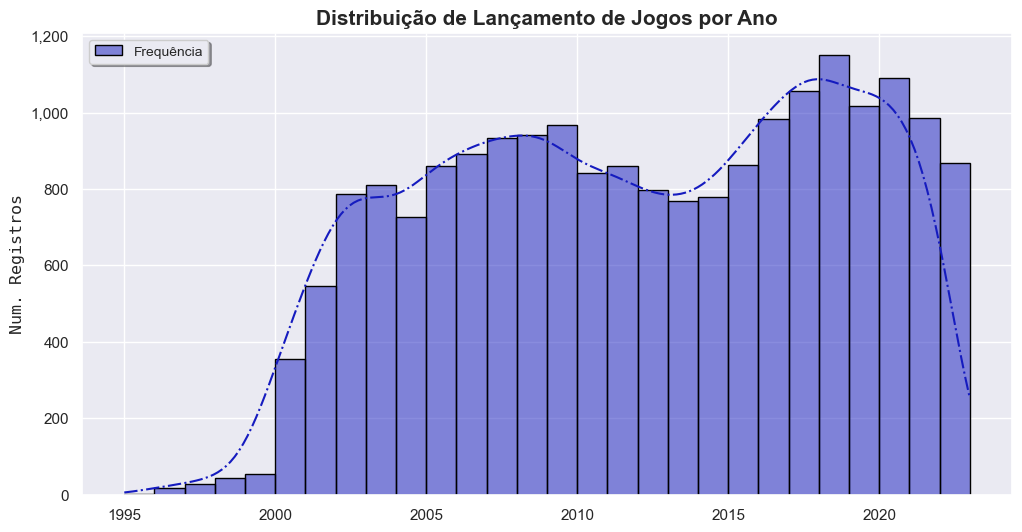

In [206]:
# Histograma:
histogram_plot(data_clean, 'Release_year', 1, 'Distribuição de Lançamento de Jogos por Ano')

**Centralidade**

- Em relação aos anos de lançamento dos jogos, temos uma tendência central entre 2015 e 2020, onde as maiores quantidades de data points se acumulam.

**Amplitude**

In [212]:
ampl = data_clean['Release_year'].max() - data_clean['Release_year'].min()

print(f'Perído de {ampl} anos.')

Perído de 28 anos.


**Simetria**

- Temos um histograma em formato de **Platô (achatado) distorcido levemente a esquerda**, onde temos um número não muito variante de frequências para cada ponto da variável analisada.

Nesse caso, de **1995 a 2000** temos uma frequência muito baixa de registros, onde a partir de 2000 se eleva vertiginosamente e alcança certa "estabilidade", um platô por volta de 2003, onde a variância subsequente não é tão expressiva.

**Conclusão:**

Podemos supor que os registros de jogos lançados por ano teve um aumento repentino a partir do ano 2000 devido ao lançamento dos console mais consagrados da indústria: **PlayStation 2 e X-Box**, que ocorreram em março de 2000 e Novembro de 2001 respectivamente.

Como dados relevantes, temos o número de vendas de cada console, onde o PlayStation 2 é, até hoje, o [**console de video-games mais vendido no mercado**](https://en.wikipedia.org/wiki/List_of_best-selling_game_consoles), com mais de 155 milhões de unidades vendidadas globalmente. Já o X-Box, mais 'nichado', chegou a um número de vendas bem inferior a seu concorrente da Sony, vendendo apenas 24 milhões de cópias. Porém, mesmo com as vendas relativamente baixas quando comparados ao sucesso enorme do PS2, [**o X-Box original foi essencial para a solidifação da Microsoft no mercado de games**](https://www.gameinformer.com/b/features/archive/2011/11/15/the-10-year-anniversary-of-the-original-xbox.aspx) e no desenvolvimento de novas tecnologias para consoles. Todos esses fatores vazem do X-Box original uma peça importantíssima para compreendermos melhor esse aumento de jogos produzidos a partir de 2000.


Abaixo seguem os números de vendas dos dois consoles:

| Console       | Num. Unidades Vendidas     |
|---------------|----------------------------|
| X-Box         | 24 milhões                 |
| PlayStation 2 | 155+ milhões               |